# Artificial Intelligence
## UECS2053 UECS2153 UEMH3073 UEMH3163

# Lab 2: Genetic Algorithm

This notebook is an assignment requiring you to investigate the Travelling Salesman Problem. Guidance is provided so you can understand what needs to be done for this assignment as you follow through this lab. Convenience classes and functions/ methods are provided.

Please take note of the following:

a. You will encounter #TODO in the code cells explaining tasks you need to complete. In other words, you will need to write codes and accomplish the #TODO tasks so that the genetic algorithm functions well and runs correctly. Look for "Replacement starts here" and "Replacement ends here" to know the parts of the codes requiring your inputs.

b. You can also modify any other codes in this notebook. 

c. You may refer to #HINT comments for more guidance on completing the tasks.

d. The important reference for this lab is as follows:

Peng Chen, "An Improved Genetic Algorithm for Solving the
Traveling Salesman Problem", 9th International Conference on Natural Computation, Shenyang, China, 2013.     

The #TODO tasks and their marks distribution are as follows:

a. #TODO1 (10 marks) in the Fitness class. You will write a new Fitness function 2, which is based on (Peng Chen, 2013).
 
b. #TODO2 (10 marks) in the Population Initialization function. You will read a set of cities from the filename when creating an initial population. 

c. #TODO3 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Tournament Selection. 

d. #TODO4 (10 marks) in the Parent Selection function. You will replace a dummy parent selection function with Proportional Selection.

e. #TODO5 (10 marks) in the Survival Selection function. You will replace the dummy survival selection function with either Fitness Based Selection or Merge, Sort & Truncate. 
    
f. #TODO6 (10 marks) in the Crossover function. You will replace the dummy crossover function with appropriate crossover approach generating valid paths. The Partially Mapped Crossover and Order Crossover approaches are examples of appropriate crossover approaches as explained in (Peng Chen, 2013). 

g. #TODO7 (10 marks) in the Mutation function. You will replace the dummy mutation function with an appropriate mutation approach generating valid paths. Shift Mutation is a suitable mutation approach as explained in (Peng Chen, 2013). 

h. #TODO8 (10 marks) in Performance Evaluation. You will present performance evaluation for the different options created in this lab, either: a) Fitness function; or b) Parent Selection function. 

Marks are also given for: Report Presentation and Formatting (10%) and Code Quality and Comments (10%). More details about this notebook and assignemnt are provided in your lab sheet.

## An Overview of the Travelling Salesman Problem

In the travelling salesman problem, a salesperson wish to find the shortest path that passes through all cities s/he wishes to visit given the coordinates of a set of cities. The salesperson should visit each of the cities once only, and so:

a. Each path consists all cities in the set.

b. Each path visits each of the cities once only. So, none of the cities are visited more than once. 

## Imports

In [1]:
%matplotlib inline

# Please add more imports if you need them 

import random
import time
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint as print 

import operator

## Convenience Classes

### City

The City class, which represents a city, possesses the properties of the city and has functions/ methods used for calculating the distance between the city and another city. Each path, represented by a chromosome, is formed by a set of cities.   

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

### Fitness

The Fitness class, which represents the fitness function, possesses the properties of a path and has functions/methods used for calculating the fitness value of the path, which is based on the distance of the path. 

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = None
        self.fitness = None
    
    def routeDistance(self):
        if self.distance == None:
            pathDistance = 0.0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i+1 < len(self.route):
                    toCity = self.route[i+1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness1(self):
        if self.fitness == None:
        # Fitness function 1 (Simple division) that uses a simple 
        # division that divides one by the distance of the path
            self.fitness = 1 / float(self.routeDistance()) 
            # Note: You must ensure a division by zero does not occur 
        return self.fitness
    
    # TODO 1 (10 marks) - Replace Fitness function 1 with Fitness function 2.
    # Implement Fitness function 2 (Maximum difference) that calculates the fitness 
    # value based on the difference between the current route and the best known route 
    # with the maximum fitness value. For more information, please refer to the 
    # Section III.B (The Fitness Function) in (Peng Chen, 2013).
    
    # Hints: You may need to change the calling function 
    
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors with slight effects on the fitness value.
    # >0 to <5 marks: Major errors with significant effects on the fitness value. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Fitness function 1 and
    # Fitness function 2 during performance evaluation later. So, you will run 
    # either Fitness function 1 or Fitness function 2 in a simulation run.
       
    def routeFitness2(self, population):
        if self.fitness == None:
            # Fitness function 2 (Maximum difference) that calculates the fitness 
            # value based on the difference between the current route and the 
            # best known route with the maximum fitness value
            
            ### Replacement starts here
            
            # Create a list to store all the route distance calculated for the current generation (population)
            getMax = []
            
            # Now we loop through the generation (population)
            for oneRouteDistance in population:
                # Calculate the route distance of each route in the current generation (population)
                # and store them into getMax
                getMax.append(Fitness(oneRouteDistance).routeDistance())
                # Obtain the maximum distance
                maximum = max(getMax)
            
            # Hence, calculate fitness value:
            self.fitness = maximum - self.routeDistance() # self.distance can simply denotes all the values in bracket
            
            ### Replacement ends here
            
            # Note: You must ensure a division by zero does not occur 
        return self.fitness

## Population Initialization  

The population initialization function (or method) performs random initialization. This creates an initial population with completely random chromosomes (or solutions). There are three functions related to population initialization. 

The first function is genCityList() which generates a set of cities from a file.  

In [4]:
def genCityList(filename):
    cityList = []
    
    # TODO 2 (10 marks) - Replace the following codes that generate 12 random cities.
    # Your new implementation must read a set of cities from the filename to be used for creating 
    # an initial population.  
    
    # Marking scheme: 
    # 4 to 5 marks:   Correct implementation. 
    # 2 to <4 marks:  Minor errors. 
    # >0 to <2 marks: Major errors.
    # 0 marks:        No answer is given. 
    
    ### Replacement starts here
    
    # read the "cities8.txt" or "cities500.txt" file
    f = open(filename, "r")
    
    # split the cities into list and store it into citiesXY
    citiesXY = f.read().splitlines()
    
    # loop through each element (city) in the citiesXY list
    for cityXY in citiesXY:
        cityX = cityXY.split()[1] # take the second element in the city as X coordinate
        cityY = cityXY.split()[2] # take the third element in the city as Y coordinate
        # create City(X,Y) instance of each city using cityX and cityY,
        # (also make sure that both cityX and cityY are integers and not string)
        # and then append them into cityList
        cityList.append(City(x = int(cityX), y = int(cityY))) 
        
    ### Replacement ends here
    
    return cityList

The second function is createRoute() which generates a random route (chromosome) from a set of City instances.

In [5]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

The third function is initialPopulation() which calls the second function repeatedly to create an initial population (a list of routes).

In [6]:
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code.

Sample run 1 initializes 12 cities in cityList as follows:

cityList = genCityList('cities8.txt') 
print(cityList)

Sample run 2 initializes 12 cities in cityList and creates a population with three routes as follows:

cityList = genCityList('cities8.txt') 
population = initialPopulation(5, cityList) 
print(population)

## Selection

Parents selection selects chromosomes with high fitness values from a population. Survivor selection selects chromosomes with higher fitness values to form the population of the next generation. The population size is len(population), so we have len(population) in this population. 

In [20]:
def rankRoutes(population):
    fitnessResults = {} # A dictionary of the fitnessResults
    
    # We iterate through the routes in the population and find their fitness values
    for i in range (0, len(population)):
        # Orginial Fitness Function
        # fitnessResults[i] = Fitness(population[i]).routeFitness1()
        # Optimized Fitness Function
        fitnessResults[i] = Fitness(population[i]).routeFitness2(population)
    
    return sorted(fitnessResults.items(), # We iterate through the items of the dictionary
                  key = operator.itemgetter(1), # The key of the sorting should be based on the order of the fitness value
                  reverse = True) # Reverse to make sure we get the highest fitness value at the top

### Parent Selection

There are three implementations for parent selection. The first parentSelection() performs random selection.

In [8]:
def parentSelection1(population, poolSize=None):
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    for i in range(0, poolSize):
        fitness = Fitness(population[i]).routeFitness2(population)
        matingPool.append(random.choice(population))
      
    return matingPool

The second parentSelection() performs Tournament Selection.

In [9]:
def parentSelection2(population, poolSize=None):
    
    # TODO 3 (10 marks) - Replace the dummy parent selection function below with  
    # Tournament Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    # Replacement starts here

    # In this tournament selection, the idea is to select 3 parents randomly and choose the winner (higher fitness value)
    # Then the winner is not allowed to join the next tournament to prevent the same winner occurs
    # The loop repeats until we meet the number of the poolSize
    
    hasStated1 = False
    
    # Make sure the poolSize is smaller or equal to population
    # Else, set to the population size
    if poolSize > len(population):
        poolSize = len(population)
        if hasStated1 == False:
            print("In parent selection, poolSize is bigger than population size.")
            print("PoolSize has been adjusted to be the same as the population size.")
            hasStated1 = True
    
    # First we set how big the tournament should be 
    tournamentSize = 3
    
    for i in range(0, poolSize):
        
        # We need to make sure the there is enough competitors in the population to fit in the tournament size
        # Else, we just take everyone in the population as the competitors
        if tournamentSize > len(population):
            tournamentSize = len(population)
        
        # Create the list of tournament pool and randomly choose the competitors based on the tournament size
        tournamentPool = []
        tournamentPool.append(random.sample(population, tournamentSize))
        
        # Fixing the tournament pool
        tournamentPool = tournamentPool[0]

        # Then, append the mating pool with the winner 
        # (highest fitness value, which the first one after sorting, and get the key of the dictionary(position of the winner))
        winnerPosition = rankRoutes(tournamentPool)[0][0]
        matingPool.append(tournamentPool[winnerPosition])
                
    # Replacement ends here
    
    return matingPool

The third parentSelection() performs Proportional Selection.

In [10]:
def parentSelection3(population, poolSize=None):
    
    # TODO 4 (10 marks) - Replace the dummy parent selection function below with  
    # Proportional Selection.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    # You will need to compare the performance achieved by Random Selection, 
    # Tournament Selection, and Proportional Selection during performance evaluation 
    # later. So, you will run either Random Selection, Tournament Selection, or 
    # Proportional Selection in a simulation run.
    
    if poolSize == None:
        poolSize = len(population)
        
    matingPool = []
    
    ### Replacement starts here
    
    hasStated1 = False
    
    # Make sure the poolSize is smaller or equal to population
    # Else, set to the population size
    if poolSize > len(population):
        poolSize = len(population)
        if hasStated1 == False:
            print("In parent selection, poolSize is bigger than population size.")
            print("PoolSize has been adjusted to be the same as the population size.")
            hasStated1 = True
    
    # Loop through the number of poolSize
    for i in range(0, poolSize):
        # Find sum of the fitness value of the chromosome (route) in the population
        sumFitness = 0
        for a in range(0, len(population)):
            # Obtain the fitness value for each chromosome in the population
            fitnessValue = Fitness(population[a]).routeFitness2(population) 
            # Total up the fitnessValue
            sumFitness += fitnessValue

        # Calculate each individual chromosome (route) in the population
        # and store it in fitnessProbability
        fitnessProbability = {}
        for b in range(0, len(population)):
            fitnessProbability[b] = Fitness(population[b]).routeFitness2(population) / sumFitness 
            
        # Then, calculate the cumulative probability by first sorting them
        fitnessProbabilitySorted = sorted(fitnessProbability.items(), key = operator.itemgetter(1))

        fitnessProbabilitySortedCum = [] # A list to store sorted cumulative probability

        previous_probability = 0.0 # Initial cumulative probability

        for c in range(0, len(population)):
            # The key is obtained from the sorted probability
            probKey = int(fitnessProbabilitySorted[c][0]) 
            # The value is added with the previous probability
            probValue = previous_probability + (fitnessProbabilitySorted[c][1])
            # Append the key and value to the cumulative probability
            fitnessProbabilitySortedCum.append((probKey,probValue))
            # Update the previous probability
            previous_probability = fitnessProbabilitySortedCum[c][1]

        # Now we select a random number in between 0.0 and 0.1
        random_number = random.random()

        # Selecting individual 
        foundParent = False
        for d in range(0, len(population)):
            if random_number < fitnessProbabilitySortedCum[d][1]:
                if foundParent == False:
                    mateKey = fitnessProbabilitySortedCum[d][0]
                    matingPool.append(population[mateKey])
                    foundParent = True

    ### Replacement ends here
    
    return matingPool

### Survival Selection

In [11]:
def survivorSelection(population, eliteSize):
    
    # TODO 5 (10 marks) - Replace the dummy survival selection function below with  
    # either Fitness Based Selection or Merge, Sort & Truncate.
      
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    elites = []
    
    ### Replacement starts here
    
    # Make sure the elite size is smaller or equal to the population size
    # Else, make the eliteSize be the same as population size
    if eliteSize > len(population):
        eliteSize = len(population)
        print("In survivorSelection, elite size is larger than population size.")
        print("Elite size has been adjusted to be the same as the population size")
    
    # Create a temporary list to store sorted population
    sortedPop = []
    
    # Next, we sort the population  
    for i in range(len(rankRoutes(population))):
        # Obtain the ranking and the sorted respective position
        position = rankRoutes(population)[i][0]
        # Append to the temporary elites list
        sortedPop.append(population[position])
        
    # Based on the eliteSize, append the tops of the sorted population into the elites list
    for i in range(eliteSize):
        elites.append(sortedPop[i])
        
    ### Replacement ends here
    
    return elites

You can run the above functions using the sample runs below. To do so, simply change the cell type from Markdown to Code. 

Sample run 1 initializes 12 cities in cityList, creates a population with four routes, and creates a pool of parents as follows:

Sample run 2 initializes 12 cities in cityList, creates a population with four routes, select an elite chromosome as follows:

## Crossover


Crossover selects two parents, crossover the genetic materials of the parents, and produce one or more children. In the Travelling Salesman Problem, each travelling path must be valid. Each path consists all cities in the set, and each path visits each of the cities once only. So, none of the cities are visited more than once. Exchanging parts of two chromosomes tend to produce invalid paths. As an example, Parent 1 is [2 1 0 7 3 5 4 6] and Parent 2 is [6 1 0 5 2 3 4 7]. One point crossover at midpoint generates Child 1 [2 1 0 7 2 3 4 7] and Child 2 [6 1 0 5 3 5 4 6]. Both children are invalid paths.     

In [12]:
def crossover(parent1, parent2):
    
    # TODO 6 (10 marks) - Replace the dummy crossover function below with any 
    # crossover approach generating valid paths. The Partially Mapped Crossover and
    # Order Crossover approaches are examples of crossover approaches suitable for 
    # the Travelling Salesman Problem. For more information, please refer to  
    # Section III.C (Improved Crossover Strategy) in (Peng Chen, 2013).
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
    
    ### Replacement starts here
    
    # Partially Mapped Crossover (PMX) is being implemented.
    
    # firstIndex denotes the first index of the mapping sections
    # This is under the assumption that at least 3 cities are within a route
    firstIndex = np.random.randint(0, len(parent1) - 2) 

    # secondIndex point denotes the last index of the mapping sections
    secondIndex = np.random.randint(firstIndex + 1 , len(parent1) - 1)

    # Declare an inner function for ease in following codes
    def oneStepPMX(p1, p2):
        # Create a list of (0,0) with the length of p1
        child = []
        
        for i in range(len(p1)):
            child.append((0,0))

        # Copy the mapping section from p1 to child
        child[firstIndex:secondIndex] = p1[firstIndex:secondIndex]

        # Copy the remaining section (not in the mapping section) while make sure no duplication in a chromosome
        # np.concatenate() joins the front and back part of the mapping section (not the mapping section itself)
        for i in np.concatenate([np.arange(0,firstIndex), np.arange(secondIndex + 1,len(p1))]):
            
            # Candidate is assigned particular position of element in p2
            candidate = p2[i]
            
            # While-loop make sures at the end, the candidate does not have the same values
            # with the genes in the mapping section
            while candidate in p1[firstIndex:secondIndex + 1]:
                # If the candidate is the same as the gene in the mapping section 
                # (means duplication exists in the chromosome)
                
                # Pick the corresponding gene in the opposite chromosome with the same position
                # index(candidate) can help to find the corresponding index
                # and p2[p1.index(candidate)] simply means 
                # take the corresponding gene in p2 that has the same index(position) of gene 
                candidate = p2[p1.index(candidate)]
            
            # Update the corresponding gene in the child chromosome with the final value of candidate
            child[i] = candidate
        
        # The codes above considers the exclusion of the gene of the position second index 
        # (or can be said as the final gene in the mapping section)
        # Hence, it needed to be updated back.
        child[secondIndex] = p1[secondIndex]
        
        return child
    
    # Call the oneStepPMX inner function with different input of parents to obtain 2 children
    child1 = oneStepPMX(parent1, parent2)
    child2 = oneStepPMX(parent2, parent1)

    ### Replacement ends here
    
    return child1, child2

Crossover selects two parents from the mating pool to produce a new generation of the same size.

In [13]:
def breedPopulation(matingpool):
    children = []
    
    # Choosing parents in their order of presence in the mating pool. Choosing parents
    # in a random manner is possible. 
    
    for i in range(1, len(matingpool), 2):
        child1, child2 = crossover(matingpool[i-1], matingpool[i])
        children.append(child1)
        children.append(child2)
    
    return children

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes 2 chromosomes in the population, and performs crossover among the two parents. 

population = initialPopulation(2, genCityList('cities8.txt'))
parent1, parent2 = population
child1, child2 = crossover(parent1, parent2)
print('Parents')
print(parent1)
print(parent2)
print('Children')
print(child1)
print(child2)

## Mutation

Mutation mutates a single chromosome to get a mutated chromosome so that genetic algorithm can converge to a shorter path quickly. In the Travelling Saleman Problem, a mutated chromosome must be a valid path. In (Peng Chen, 2013), shift mutation removes a number of random genes of a chromosome, and then inserts them into a random position of the chromosome. As an example, the shift mutation shifts a single gene in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 2 4 5 6 7 3 8 9 10] mutated chromosome. As another example, the shift mutation shifts two consecutive genes in the [1 2 3 4 5 6 7 8 9 10] chromosome to generate the [1 4 5 6 7 2 3 8 9 10] mutated chromosome.

In [14]:
def mutate(route, mutationProbability):
    
    # TODO 7 (10 marks) - Replace the dummy mutation function below with any 
    # mutation approach generating valid paths. The dummy mutation function 
    # simply swaps a city with the city before it. Shift Mutation is an example 
    # of mutation approaches suitable for the Travelling Salesman Problem. 
    # For more information, please refer to Section III.D (Improved Mutation 
    # Strategy) in (Peng Chen, 2013).
   
    # Marking scheme: 
    # 7 to 10 marks:  Correct implementation. 
    # 5 to <7 marks:  Minor errors.
    # >0 to <5 marks: Major errors. 
    # 0 marks:        No answer is given. 
     
    mutated_route = route[:]
    for i in range(len(route)):
        if (random.random() < mutationProbability):
            # mutationProbability is the probability of a gene undergoing mutation
            
            ### Replacement starts here

            # First, determine the index of city needed to be swapped
            swapIndex = int(random.random() * len(route))

            # Next, temporary assign the current position's genes values to city1 and city2
            city1 = mutated_route[i]
            city2 = mutated_route[swapIndex]

            # Lastly, swap the positions of the genes using the values of city1 and city2
            mutated_route[i] = city2
            mutated_route[swapIndex] = city1
            
            ### Replacement ends here
    return mutated_route

Mutation runs over the entire population and mutates each chromosome in the population with a small mutationProbability. 

In [15]:
def mutation(population, mutationProbability):
    mutatedPopulation = []
    for i in range(0, len(population)):
        mutatedIndividual = mutate(population[i], mutationProbability)
        mutatedPopulation.append(mutatedIndividual)
    return mutatedPopulation

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a route comprised of 12 cities in cityList, and then mutates it as follows:

## Running One Generation (or Interation)

Here, we run one generation of genetic algorithm. 

In [16]:
def oneGeneration(population, eliteSize, mutationProbability):
    
    # First we preserve the elites
    elites = survivorSelection(population, eliteSize)
    
    # Then we calculate what our mating pool size should be and generate
    # the mating pool
    poolSize = len(population) - eliteSize
    matingpool = parentSelection2(population, poolSize)
        
    # Then we perform crossover on the mating pool
    children = breedPopulation(matingpool)
    
    # We combine the elites and children into one population
    new_population = elites + children
    
    # We mutate the population
    mutated_population = mutation(new_population, mutationProbability)
    return mutated_population

You can run the above functions using the sample run below. To do so, simply change the cell type from Markdown to Code. The sample run initializes a population comprised of 5 chromosomes based on 12 cities in cityList, and then run one generation (or iteration) of genetic algorithm as follows:

population = initialPopulation(20, genCityList('cities8.txt'))
eliteSize = 5
mutationProbability = 0.01
new_population = oneGeneration(population, eliteSize, mutationProbability)
#print('Initial population')
#print(population)
print('New population')
print(new_population)

## Running Many Generations (or Interations) 

In [17]:
def runSimulation(filename):
    timeStart = time.time()
    
    # filename = 'cities8.txt' # or cities500.txt
    popSize = 20
    eliteSize = 5
    mutationProbability = 0.01
    iteration_limit = 100
    progressList = [] # For Genetic Plot
    #random.seed(42) # for evaluation purpose, such as maintain the same first population (generation)

    cityList = genCityList(filename)

    population = initialPopulation(popSize, cityList)
    distances = [Fitness(p).routeDistance() for p in population]
    min_dist = min(distances)
    print("Best distance for initial population: " + str(min_dist))

    for i in range(iteration_limit):
        population = oneGeneration(population, eliteSize, mutationProbability)
        distances = [Fitness(p).routeDistance() for p in population]
        index = np.argmin(distances)
        best_route = population[index]
        min_dist = min(distances)

        # Genetic Plot
        progressList.append(min_dist)

        #print("Best distance for population in iteration " + str(i) + ": " + str(min_dist))

    # The best distance in last interation
    print("Best distance for population in last iteration: " + str(min_dist))
    
    print("-----")
    
    ### 1. Duration for the algorithm to run
    duration = time.time() - timeStart
    print("1. Time taken : " + str(duration) + "s")
    
    print("-----")
    
    ### 2. Optimal Path
    print("2. Optimal path : " + str(best_route))

    print("-----")
    
    ### 3. Genetic Plot (used to show the convergence rate)
    plt.plot(progressList)
    plt.title("3. Genetic Algorithm Plot (shows Convergence Rate)")
    plt.xlabel("Iteration")
    plt.ylabel("Distance")
    plt.show()
    
    ### Graph of cities and the optimal route
    graph_route = []
    
    # Iterate through best_route components (best_route is City object, not iterable)
    # and append the values to graph_route
    for i in range(len(best_route)):
        routeX = best_route[i].x
        routeY = best_route[i].y
        graph_route.append((routeX,routeY))
        
    # Make sure the last city connects to first city to ensure a closed route
    graph_route.append((best_route[0].x, best_route[0].y))
    
    # Graphing the cities and line them up
    x,y = list(zip(*graph_route)) # unzip the values to x and y
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.title("Graph of cities and the optimal route")
    plt.xlabel("X-coordinates")
    plt.ylabel("Y-coordinates")
    plt.show()

    # TODO 8 (10 marks) - Performance Evaluation. You will present the performance achieved 
    # by different options created in this lab. You can choose to investigate either
    # a) Fitness function; or b) Parent Selection function. For fitness function, you compare 
    # the performance achieved by Fitness function 1 (Simple division) and 
    # Fitness function 2 (Maximum difference). For parent selection function, you compare the 
    # performance achieved by Random Selection, Tournament Selection, and Proportional Selection. 
   
    # Marking scheme: 
    # 7 to 10 marks:  In-depth performance evaluation. Optimal routes are found. 
    # 5 to <7 marks:  Clear understanding of performance evaluation.
    # >0 to <5 marks: Inaccurate or unclear understanding of performance evaluation. 
    # 0 marks:        No answer is given. 

## TODO8 - Performance Evaluation

In this section, we do performance evaluation based on **different fitness function**, while maintaining the choice of tournament selection as the method of parent selection.

We evaluate the performance (using cities8 and cities500) based on:
1. **Time used for the whole algorithm to run**
2. **Comparison between the distance of the optimal route**
3. **Rate of convergence**

Finally, we **plot out the graph of cities and the optimal route** for both cities8 and cities500.

Note: For evaluation purpose, to maintain consistency, we set the random.seed(42).

### Using Fitness function 1 (Simple division)

'Best distance for initial population: 21964.57355095115'
'Best distance for population in last iteration: 19145.65899266102'
'-----'
'1. Time taken : 0.7399992942810059s'
'-----'
('2. Optimal path : [(84,4787), (2360,4809), (4116,4225), (4672,1791), '
 '(6178,2991), (6248,5294), (6233,5420), (1300,7375)]')
'-----'


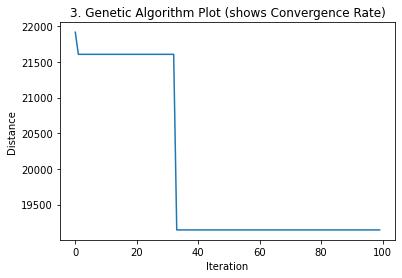

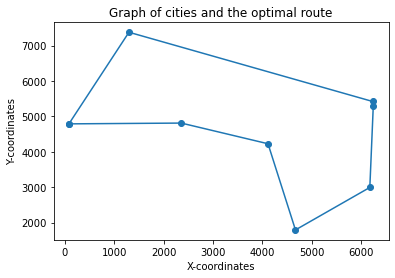

In [18]:
# Cities8.txt 
runSimulation("cities8.txt")

'Best distance for initial population: 2005936.4585671655'
'Best distance for population in last iteration: 1682396.993714968'
'-----'
'1. Time taken : 37.65384316444397s'
'-----'
('2. Optimal path : [(7501,366), (4577,5981), (6248,5294), (2969,6592), '
 '(4364,7388), (4499,2918), (5162,1194), (5036,6338), (2072,3949), '
 '(1162,3471), (297,956), (3380,1481), (183,5734), (1117,3483), (840,5227), '
 '(6889,2669), (2446,4395), (6415,2879), (6041,3215), (1656,6273), (2993,26), '
 '(3267,5703), (5250,5822), (2480,473), (4399,5425), (6386,3068), (6059,6167), '
 '(3478,6669), (6616,619), (6869,89), (6411,241), (7458,694), (7214,2028), '
 '(1748,3624), (2237,2776), (6239,4524), (3724,1075), (4606,7562), '
 '(2955,5928), (7997,4812), (6774,4713), (5019,1237), (6206,2866), '
 '(7187,2985), (6774,5034), (6042,6983), (2206,7293), (678,5569), (446,6858), '
 '(3752,7240), (365,6700), (2459,120), (7575,1644), (5873,3868), (7581,3088), '
 '(5451,991), (3467,2927), (2014,3052), (5215,436), (2241,7259)

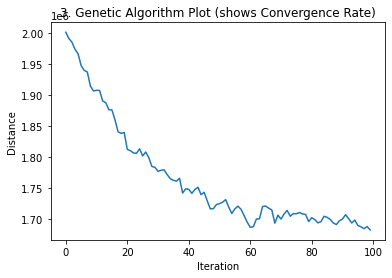

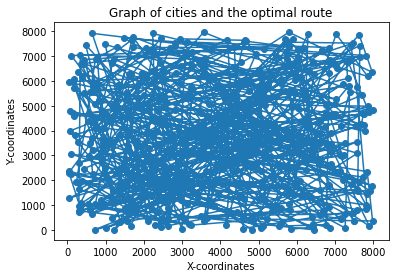

In [19]:
# Cities500.txt
runSimulation("cities500.txt")

### Using Fitness function 2 (Maximum difference)

'Best distance for initial population: 21964.57355095115'
'Best distance for population in last iteration: 19145.65899266102'
'-----'
'1. Time taken : 11.144721508026123s'
'-----'
('2. Optimal path : [(6233,5420), (6248,5294), (6178,2991), (4672,1791), '
 '(4116,4225), (2360,4809), (84,4787), (1300,7375)]')
'-----'


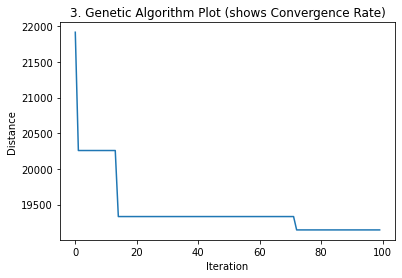

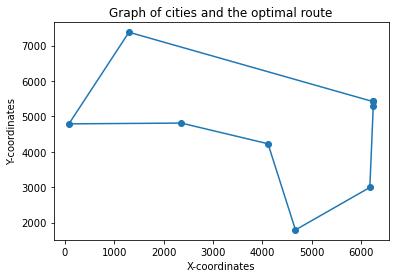

In [21]:
# Cities8.txt 
runSimulation("cities8.txt")

'Best distance for initial population: 2005936.4585671655'
'Best distance for population in last iteration: 1657683.5854508707'
'-----'
'1. Time taken : 645.7619836330414s'
'-----'
('2. Optimal path : [(7743,4672), (7029,7886), (6030,4906), (5873,3868), '
 '(6415,2879), (2431,6729), (1111,3629), (7552,4189), (3913,1997), (428,2470), '
 '(730,1025), (60,3982), (5464,6992), (3562,7964), (106,7025), (849,927), '
 '(6696,778), (7821,1440), (2446,4395), (2545,2557), (2467,6036), (2776,3580), '
 '(5102,5636), (2997,528), (3470,4102), (596,5541), (1300,7375), (1197,4987), '
 '(435,5521), (2638,499), (1162,3471), (597,3498), (952,3619), (3714,5076), '
 '(84,4787), (2955,5928), (342,7066), (1720,7367), (1213,6882), (2136,3301), '
 '(3493,4725), (4528,6762), (5215,436), (4183,2677), (2578,2362), (2348,3977), '
 '(686,5960), (678,5569), (481,7459), (4740,5616), (4577,5981), (2812,7515), '
 '(6102,6169), (6665,7230), (2638,902), (5451,991), (1312,2297), (6386,3068), '
 '(5957,1905), (3659,471), (5

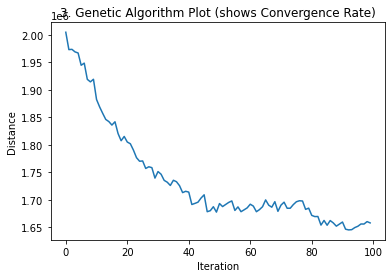

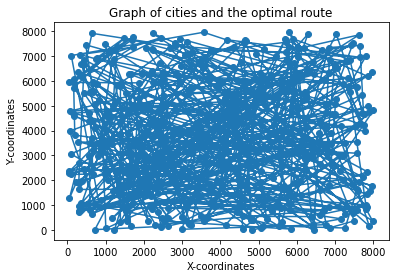

In [22]:
# Cities500.txt
runSimulation("cities500.txt")

### Cities8.txt performances with different fitness function

| Fitness Function | Time(seconds) | Shortest Distance | Convergence Rate |
| ----------- | ----------- | ----------- | ----------- |
| Function 1 - Simple Division | 0.74 | 19145.66 | Fast |
| Function 2 - Maximum Difference | 11.14 | 19145.66 | Very Fast |

1. **Time**: Function 1 (simple division) is much faster in performing the simulation than Function 2 (maxium difference). This is due to Function 1 only needs to perform inverse of the distance to obtain fitness value. Meanwhile, Function 2 has to store the distances and find maximum value, then only perform substraction to obtain the fitness value.


2. **Shortest Distance**: Function 1 is able to achieve the same optimal route as Function 2.


3. **Convergence Rate**: Function 2 converges faster than Function 1, but this may cause the reduction of the diversity of the individual in a generation.

### Cities500.txt performances with different fitness function

| Fitness Function | Time(seconds) | Shortest Distance | Convergence Rate |
| ----------- | ----------- | ----------- | ----------- |
| Function 1 - Simple Division | 37.65 | 1682396.99 | Moderate |
| Function 2 - Maximum Difference | 645.76 | 1657683.59 | Moderately Fast |

1. **Time**: Function 1 (simple division) is much faster in performing the simulation than Function 2 (maxium difference). As the number of cities increases, the amount of distance values to be stored in getMax increase, and the amount of the time needed to loop through the list to obtain maximum value increases.


2. **Shortest Distance**: Function 2 manages to obtain better optimal route than Function 1.


3. **Convergence Rate**: Both functions have almost the same convergence rate.

**Conclusion:** At lower number of cities (population), Function 1 seems to be favored in term of simulation time and slightly only lower convergence rate than Function 2. At higher number of cities (population), Function 2 can be chosen. Although it seems to take more time for the simulation to run, the optimal route obtained is much better than the one obtained through Function 1. Overall, Function 2 is favored as it is optimized and works better as the number of population increases.

**Reference**:
1. De Luca, G. (2020, October 19). *Roulette Selection in Genetic Algorithms*. https://www.baeldung.com/cs/genetic-algorithms-roulette-selection , accessed on 6 August 2022.


2. Peng Chen, "An Improved Genetic Algorithm for Solving the Traveling Salesman Problem", *In Proceedings of 9th International Conference on Natural Computation*, Shenyang, China, 2013.


3. Stoltz, E. (2018, July 18). *Evolution of a salesman: A complete genetic algorithm tutorial for Python*. Medium. https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35 , accessed on 8 August 2022.